In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

['c:\\Users\\tobyw\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip', 'c:\\Users\\tobyw\\AppData\\Local\\Programs\\Python\\Python312\\DLLs', 'c:\\Users\\tobyw\\AppData\\Local\\Programs\\Python\\Python312\\Lib', 'c:\\Users\\tobyw\\AppData\\Local\\Programs\\Python\\Python312', '', 'C:\\Users\\tobyw\\AppData\\Roaming\\Python\\Python312\\site-packages', 'C:\\Users\\tobyw\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32', 'C:\\Users\\tobyw\\AppData\\Roaming\\Python\\Python312\\site-packages\\win32\\lib', 'C:\\Users\\tobyw\\AppData\\Roaming\\Python\\Python312\\site-packages\\Pythonwin', 'c:\\Users\\tobyw\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages', 'c:\\Users\\tobyw\\Documents\\ChrisPython\\ConformalProject\\notebooks\\ConformalProject\\src']


In [ ]:
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [ ]:
from ConformalMethods import AdaptiveCP

### I want to investigate how ACI performance varies with different lookback windows. This will help me understand how a scaled lookback and ACI would work together.

I hypothesis that the smaller the lookback, the aci will perform best with a smaller gamma as it will natrually not need to correct itself as much.

In [3]:
ACP = AdaptiveCP(0.3)

In [39]:
no_shift_data = ACP_data.no_shift(seq_length=500, datapoints=50)

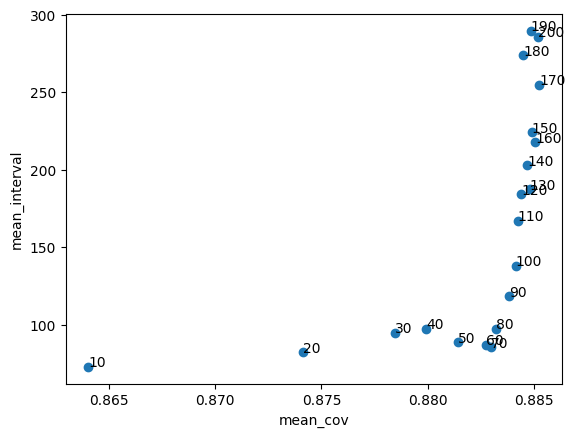

In [40]:
num_trials = 20
gammas = np.linspace(10, 200, num_trials).astype(int)

cov_track = [[] for _ in range(num_trials)]
interval_track = [[] for _ in range(num_trials)]

for data in no_shift_data:
    aci_different_lookback = [ACP.ACI(data, 0.15, custom_interval=int(lookback), title=str(lookback)) for lookback in gammas]
    for i, data in enumerate(aci_different_lookback):
        cov_track[i].append(data['realised_interval_coverage'])
        interval_track[i].append(data['average_prediction_interval'])

mean_cov = [np.mean(cov) for cov in cov_track]
mean_interval = [np.mean(interval) for interval in interval_track]

# Create a scatter plot
plt.scatter(mean_cov, mean_interval)

# Label the points
for i in range(len(gammas)):
    plt.annotate(str(gammas[i]), (mean_cov[i], mean_interval[i]))

# Add x and y labels
plt.xlabel('mean_cov')
plt.ylabel('mean_interval')

# Show the plot
plt.show()

As expected we have that the larger the window is the better the performance on non changing data. We will now try to vary the gamma to see the effect which this has.

In [45]:
def gamma_from_lookback(custom_lookback):
    num_trials = 15
    gammas = np.linspace(0.001, 0.3, num_trials)
    cov_track = [[] for _ in range(num_trials)]
    interval_track = [[] for _ in range(num_trials)]

    for data in no_shift_data:
        aci_different_lookback = [ACP.ACI(data, gamma, custom_interval=custom_lookback, title=str(gamma)) for gamma in gammas]
        for i, data in enumerate(aci_different_lookback):
            cov_track[i].append(data['realised_interval_coverage'])
            interval_track[i].append(data['average_prediction_interval'])

    mean_cov = [np.mean(cov) for cov in cov_track]
    mean_interval = [np.mean(interval) for interval in interval_track]

    # Create a scatter plot
    plt.scatter(mean_cov, mean_interval)

    # Label the points
    for i in range(len(gammas)):
        plt.annotate(str(round(gammas[i], 2)), (mean_cov[i], mean_interval[i]))

    # Add x and y labels
    plt.xlabel('mean_cov')
    plt.ylabel('mean_interval')
    plt.title('Custom lookback: ' + str(custom_lookback))

    # Show the plot
    plt.show()

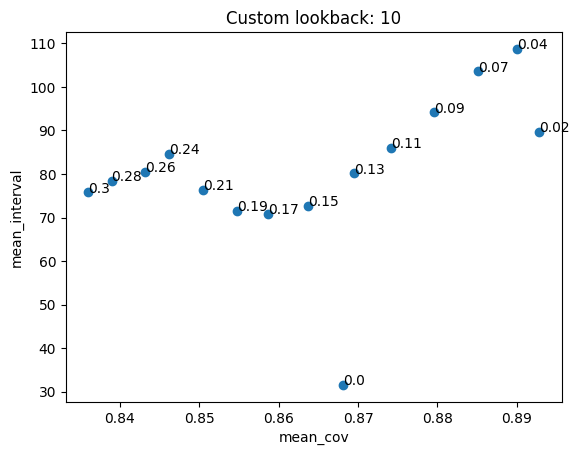

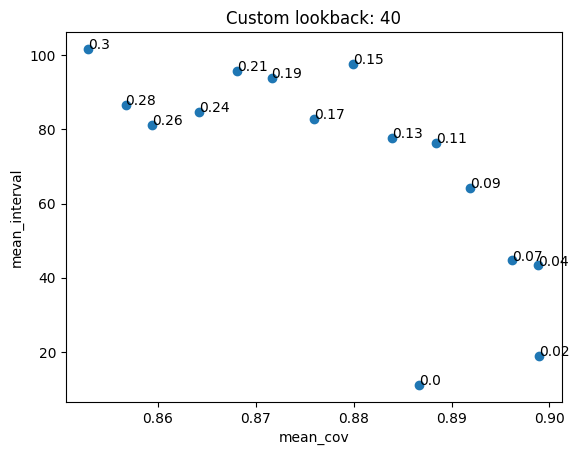

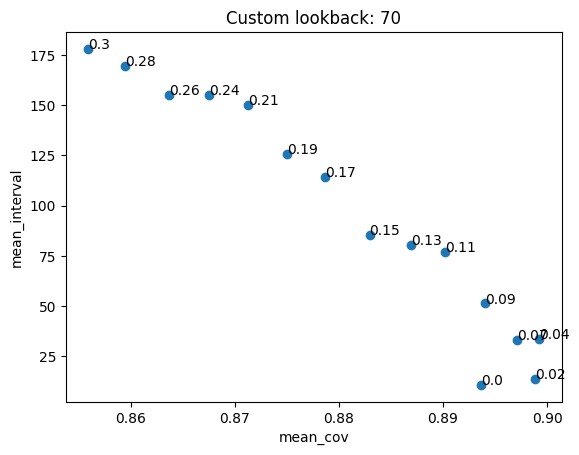

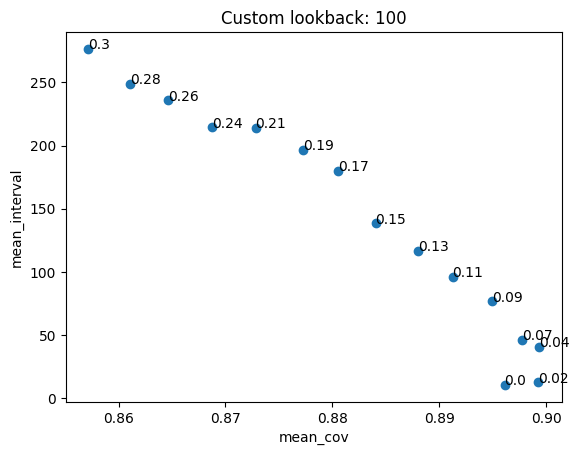

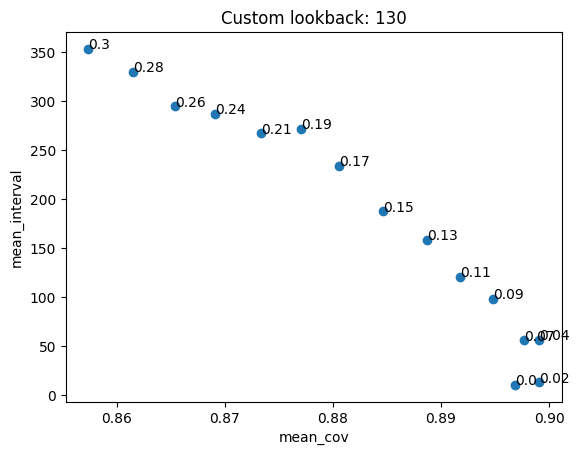

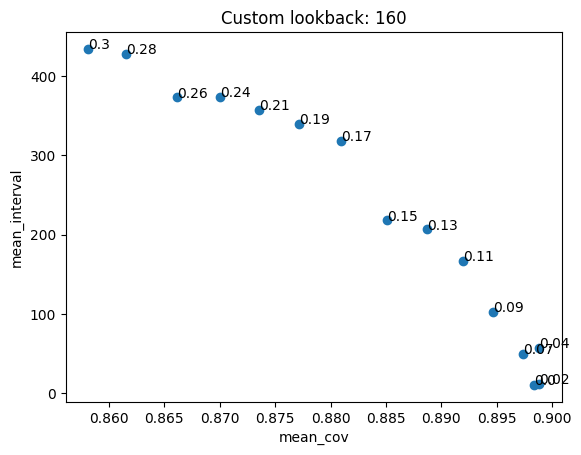

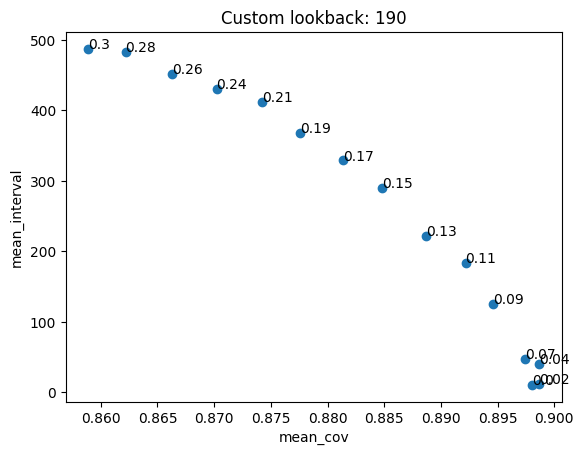

In [46]:
for lookback in range(10, 200, 30):
    gamma_from_lookback(lookback)

## now to test on a single shift.

In [36]:
single_shift_data = ACP_data.single_shift((0,1), (4, 2), seq_length=500, shift_point=250, datapoints=30)

[(10, 0.8580100250626566, 37.860384327833444), (20, 0.8716106934001668, 38.407766932532574), (30, 0.8775923141186299, 39.42419828721777), (40, 0.8810142021720968, 40.682717367349234), (50, 0.8823174603174605, 39.211993866331795), (60, 0.8827455012853472, 40.20453277768672), (70, 0.8832682497801232, 41.47518909261604), (80, 0.8849430894308943, 42.98697162319982), (90, 0.8862952646239555, 44.61510486550162), (100, 0.8871518624641835, 44.58728490342352), (110, 0.8876381514257621, 49.15697230379351), (120, 0.88822695035461, 49.779029173245114), (130, 0.8886269592476488, 48.532139574292046), (140, 0.8895857605177991, 49.068000305417534), (150, 0.8907313266443702, 51.64384899358467), (160, 0.89118800461361, 51.294120898826606), (170, 0.8917610513739547, 49.710307627665884), (180, 0.8927856257744735, 50.61232514781698), (190, 0.8936473616473618, 47.75986224591101), (200, 0.8948567603748326, 49.60708708938645)]


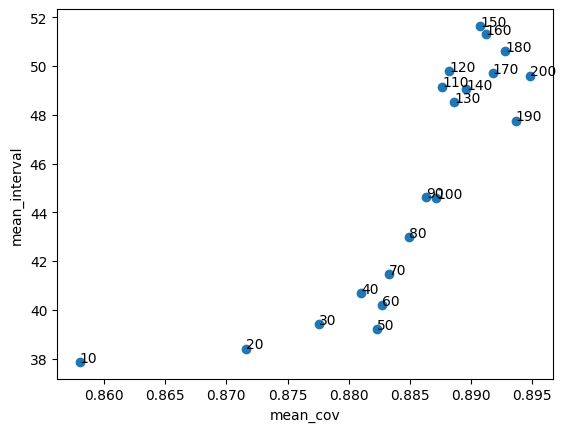

In [37]:
num_trials = 20
gammas = np.linspace(10, 200, num_trials).astype(int)

cov_track = [[] for _ in range(num_trials)]
interval_track = [[] for _ in range(num_trials)]

for data in single_shift_data:
    aci_different_lookback = [ACP.ACI(data, 0.15, custom_interval=int(lookback), title=str(lookback)) for lookback in gammas]
    for i, data in enumerate(aci_different_lookback):
        cov_track[i].append(data['realised_interval_coverage'])
        interval_track[i].append(data['average_prediction_interval'])

mean_cov = [np.mean(cov) for cov in cov_track]
mean_interval = [np.mean(interval) for interval in interval_track]

# Create a scatter plot
plt.scatter(mean_cov, mean_interval)

# Label the points
for i in range(len(gammas)):
    plt.annotate(str(gammas[i]), (mean_cov[i], mean_interval[i]))

# Add x and y labels
plt.xlabel('mean_cov')
plt.ylabel('mean_interval')

# Show the plot
plt.show()

Have developed a good way to test, will be intresting to see what the plots look like for random data. Also have to rember that you are interested in how to swap them.

In [12]:
def data_as_dependent(all_data, gamma=0.05):
    num_trials = 20
    gammas = np.linspace(10, 200, num_trials).astype(int)

    cov_track = [[] for _ in range(num_trials)]
    interval_track = [[] for _ in range(num_trials)]

    for data in all_data:
        aci_different_lookback = [ACP.ACI(data, gamma, custom_interval=int(lookback), title=str(lookback)) for lookback in gammas]
        for i, data in enumerate(aci_different_lookback):
            cov_track[i].append(data['realised_interval_coverage'])
            interval_track[i].append(data['average_prediction_interval'])

    mean_cov = [np.mean(cov) for cov in cov_track]
    mean_interval = [np.mean(interval) for interval in interval_track]

    # Create a scatter plot
    plt.scatter(mean_cov, mean_interval)

    # Label the points
    for i in range(len(gammas)):
        plt.annotate(str(gammas[i]), (mean_cov[i], mean_interval[i]))

    # Add x and y labels
    plt.xlabel('mean_cov')
    plt.ylabel('mean_interval')

    # Show the plot
    plt.show()

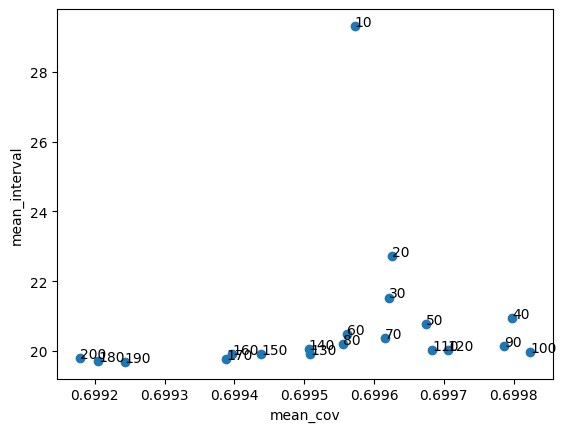

In [10]:
random_data = ACP_data.random_multi_shift(50, (1000, 1500), number_shift_range=(2, 7))

data_as_dependent(random_data)

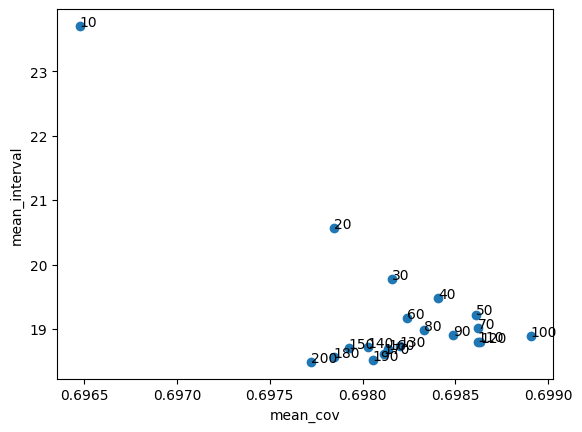

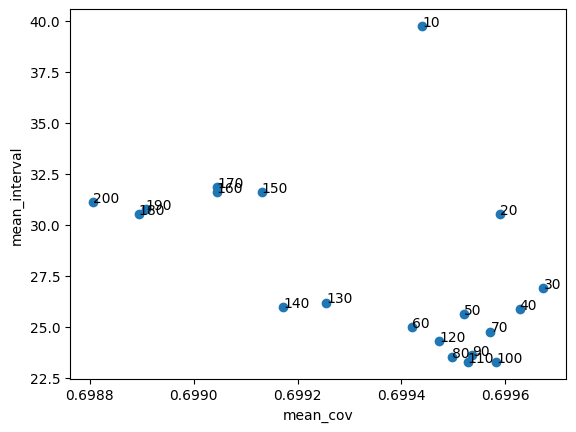

In [13]:
data_as_dependent(random_data, 0.01)
data_as_dependent(random_data, 0.1)


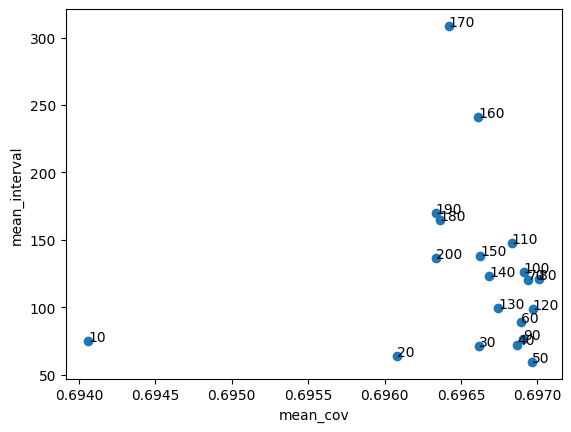

In [14]:
data_as_dependent(random_data, 0.2)


The performance of different window sizes varies heavily with different alphas, 
Does this provide evidence for a method which scales both?

In [ ]:
 def data_as_dependent(all_data, gamma=0.05):
    num_trials = 20
    gammas = np.linspace(10, 200, num_trials).astype(int)

    cov_track = [[] for _ in range(num_trials)]
    interval_track = [[] for _ in range(num_trials)]

    for data in all_data:
        aci_different_lookback = [ACP.DtACI(data, custom_interval=int(lookback), title=str(lookback)) for lookback in gammas]
        for i, data in enumerate(aci_different_lookback):
            cov_track[i].append(data['realised_interval_coverage'])
            interval_track[i].append(data['average_prediction_interval'])

    mean_cov = [np.mean(cov) for cov in cov_track]
    mean_interval = [np.mean(interval) for interval in interval_track]

    # Create a scatter plot
    plt.scatter(mean_cov, mean_interval)

    # Label the points
    for i in range(len(gammas)):
        plt.annotate(str(gammas[i]), (mean_cov[i], mean_interval[i]))

    # Add x and y labels
    plt.xlabel('mean_cov')
    plt.ylabel('mean_interval')

    # Show the plot
    plt.show()